In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score as acc
#import mnist
from keras.metrics import AUC
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# можно брать mnist из специальной библиотеки
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

4431872/4422102 [==============================] - 0s 0us/step


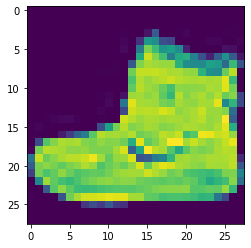

9


In [5]:
plt.imshow(train_imagesi[0,:,:])
plt.show()
print(train_labels[0])

In [6]:
train_imagesi.shape

(60000, 28, 28)

In [7]:
train_images.shape

(60000, 784)

In [26]:
def model_keras(neurons_numb1 = -1, layers = 2, opt = 'adam', p = 11):
  
  model = Sequential(name='my_model')
  model.add(Dense(      128, activation='relu', input_shape=(784,)))  
  if neurons_numb1 != -1:
    model.add(Dense(neurons_numb1, activation='tanh'))
  else:
    for k in range(layers):
      model.add(Dense(10+(p-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

  model.add(Dense(10, activation='softmax'))

  model.compile(
    optimizer= opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )


  model.fit(  
    train_images,
    to_categorical(train_labels),
    epochs=15,
    batch_size=1024, validation_split=0.2
  )


  model.evaluate( 
    test_images,
    to_categorical(test_labels)
  )

  y_pred_tr = model.predict(train_images)
  y_pred_class_tr = np.argmax(y_pred_tr,axis=1)

  y_pred_tst = model.predict(test_images)
  y_pred_class_tst = np.argmax(y_pred_tst,axis=1)
 
  acc_train = acc(train_labels, y_pred_class_tr)
  acc_test = acc(test_labels, y_pred_class_tst)

  return model, acc_train, acc_test
  

In [28]:
acc_table = pd.DataFrame(columns = ['neyrons', 'train_acc', 'test_acc'])
ik = 0 
for neyrons in [64, 90, 110, 128, 150, 200, 250, 400]:
  acc_table_mean = [[],[]]
  for j in range(5):
    model1, acc_train, acc_test = model_keras(neurons_numb1 = neyrons)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table.loc[ik, ['neyrons', 'train_acc', 'test_acc']] = [neyrons , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik+=1
display(acc_table)
#acc_table

Epoch 1/15
47/47 [==============================] - 2s 26ms/step - loss: 1.6135 - accuracy: 0.4512 - val_loss: 0.8083 - val_accuracy: 0.7278
Epoch 2/15
47/47 [==============================] - 1s 19ms/step - loss: 0.7934 - accuracy: 0.7297 - val_loss: 0.6994 - val_accuracy: 0.7527
Epoch 3/15
47/47 [==============================] - 1s 22ms/step - loss: 0.7033 - accuracy: 0.7471 - val_loss: 0.6690 - val_accuracy: 0.7578
Epoch 4/15
47/47 [==============================] - 1s 21ms/step - loss: 0.6695 - accuracy: 0.7620 - val_loss: 0.6867 - val_accuracy: 0.7533
Epoch 5/15
47/47 [==============================] - 1s 20ms/step - loss: 0.6557 - accuracy: 0.7637 - val_loss: 0.6134 - val_accuracy: 0.7699
Epoch 6/15
47/47 [==============================] - 1s 20ms/step - loss: 0.5946 - accuracy: 0.7820 - val_loss: 0.5882 - val_accuracy: 0.7848
Epoch 7/15
47/47 [==============================] - 1s 19ms/step - loss: 0.6089 - accuracy: 0.7771 - val_loss: 0.5626 - val_accuracy: 0.7932
Epoch 8/15
47

,neyrons,train_acc,test_acc
0,64,0.807363,0.79226
1,90,0.82337,0.81182
2,110,0.825327,0.81238
3,128,0.83066,0.81626
4,150,0.833997,0.8206
5,200,0.83936,0.82516
6,250,0.843267,0.8306
7,400,0.857627,0.84108


In [29]:
acc_table.to_csv('acc_table_neurons.csv')

In [ ]:
acc_table_lrs = pd.DataFrame(columns = ['layers', 'train_acc', 'test_acc'])
ik = 0 
for layer in [2, 3, 5, 10]:
  for j in range(5):
    model1, acc_train, acc_test = model_keras(layers = layer)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table_lrs.loc[ik, ['layers', 'train_acc', 'test_acc']] = [layer , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik+=1
display(acc_table_lrs)

In [31]:
display(acc_table)
display(acc_table_lrs)

,neyrons,train_acc,test_acc
0,64,0.807363,0.79226
1,90,0.82337,0.81182
2,110,0.825327,0.81238
3,128,0.83066,0.81626
4,150,0.833997,0.8206
5,200,0.83936,0.82516
6,250,0.843267,0.8306
7,400,0.857627,0.84108


,layers,train_acc,test_acc
0,2,0.837707,0.82414
1,3,0.830179,0.817693
2,5,0.825873,0.81333
3,10,0.818553,0.806236


In [ ]:
acc_table_opt = pd.DataFrame(columns = ['optimizer', 'train_acc', 'test_acc'])
ik = 0
for optim in ['adam', 'SGD', 'RMSProp']:
  acc_table_mean = [[],[]]
  for j in range(5):
    model3, acc_train, acc_test = model_keras(layers = 2, opt = optim, p = 10)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table_opt.loc[ik, ['optimizer', 'train_acc', 'test_acc']] = [optim , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik += 1
display(acc_table_opt)

In [44]:
acc_table_opt

,optimizer,train_acc,test_acc
0,adam,0.82436,0.8107
1,SGD,0.82003,0.80894
2,RMSProp,0.805243,0.7937


Были сделаны расчеты для сетей с разным количеством нейронов, слоев и разными оптимизаторами. Видно, что повышение количества нейронов привело к существенному 
увеличению метрики сети,при этом увеличение количества слоев, обратно уменьшило метрику(правда не существенно). Идеальным количеством слоев можно признать 2 слоя.
Из тестировании на разные оптимизаторы, можно сделать вывод, что Adam  привел к наилучшей метрике. При этом метрика для "Adam" не существенно лучше остальных двух. 

In [ ]:
model4 = Sequential(name='my_model4')
model4.add(Dense(      128, activation='relu', input_shape=(784,)))  
for k in range(2):
  model4.add(Dense(10+(10-k)*10, activation='tanh')) 

model4.add(Dense(10, activation='softmax'))

model4.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


model4.fit(  
    train_images,
    to_categorical(train_labels),
    epochs=15,
    batch_size=1024, validation_split=0.2
)


model4.evaluate( 
    test_images,
    to_categorical(test_labels)
)

y_pred_tst = model4.predict(test_images)
y_pred_class_tst = np.argmax(y_pred_tst ,axis=1)

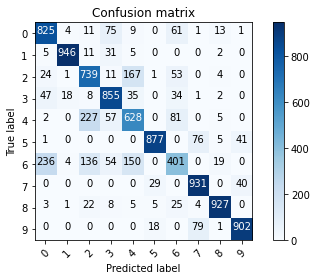

In [43]:
from sklearn.metrics import confusion_matrix
import itertools


cnf_matrix = confusion_matrix(test_labels, y_pred_class_tst)

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names = [str(idx) for idx in range(10)]

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

In [57]:
for i in range(10):
    prec = cnf_matrix[i][i]/ np.sum(cnf_matrix[i])
    rec = cnf_matrix[i][i]/ np.sum(cnf_matrix.T[i])
    print('Точность для класса ' + str(i))
    print(prec)
    print('Полнота для класса ' + str(i))
    print(rec)

Точность для класса 0
0.825
Полнота для класса 0
0.7217847769028871
Точность для класса 1
0.946
Полнота для класса 1
0.971252566735113
Точность для класса 2
0.739
Полнота для класса 2
0.6403812824956673
Точность для класса 3
0.855
Полнота для класса 3
0.7836846929422548
Точность для класса 4
0.628
Полнота для класса 4
0.6286286286286287
Точность для класса 5
0.877
Полнота для класса 5
0.943010752688172
Точность для класса 6
0.401
Полнота для класса 6
0.6122137404580152
Точность для класса 7
0.931
Полнота для класса 7
0.8525641025641025
Точность для класса 8
0.927
Полнота для класса 8
0.9478527607361963
Точность для класса 9
0.902
Полнота для класса 9
0.9166666666666666


Видно, что классы 1, 7, 8, 9 определились лучше всего. При этом хуже всех определился класс 6. Классы 0,2,5 определились с достаточной точностью, а класс 4, неудовлетворительно, но явно лучше, чем 6 класс